In [85]:
import pandas as pd
import numpy as np




df = pd.read_csv('good.txt')
str_n = df.columns[3]
str_m = df.columns[4]
df = df.drop([str_n, str_m], axis=1)
df.columns=['x', 't', 'v']
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421 entries, 0 to 8420
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       8421 non-null   float64
 1   t       8421 non-null   float64
 2   v       8421 non-null   float64
dtypes: float64(3)
memory usage: 197.5 KB
        x       t         v
0     0.0  0.0000  1.000000
1     0.0  0.0125  0.999922
2     0.0  0.0250  0.999688
3     0.0  0.0375  0.999297
4     0.0  0.0500  0.998750
...   ...     ...       ...
8416  1.0  4.9500  0.813674
8417  1.0  4.9625  0.841711
8418  1.0  4.9750  0.867644
8419  1.0  4.9875  0.891409
8420  1.0  5.0000  0.912945

[8421 rows x 3 columns]


In [86]:
n = int(str_n)
m = int(str_m)
print(n,m)

20 400


In [87]:
X = []
T = []
V = []
for i in range(n + 1):
    x = []
    t = []
    v = []
    for j in range(m + 1):
        x.append(df.loc[i * (m + 1) + j, 'x'])
        t.append(df.loc[i * (m + 1) + j, 't'])
        v.append(df.loc[i * (m + 1) + j, 'v'])
    X.append(x)
    T.append(t)
    V.append(v)
X = np.array(X)
T = np.array(T)
V = np.array(V)

In [88]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

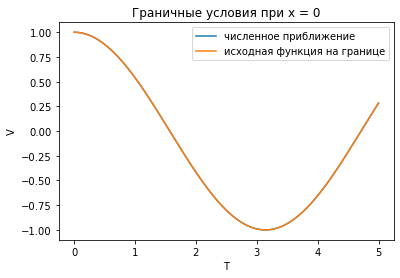

In [89]:
plt.plot(T[0], V[0], label='численное приближение')
plt.plot(np.linspace(0, 5, 1000), [np.cos(t) for t in np.linspace(0, 5, 1000)], label = 'исходная функция на границе')
plt.xlabel('T')
plt.ylabel('V')
plt.title('Граничные условия при x = 0')
plt.legend()
plt.show()

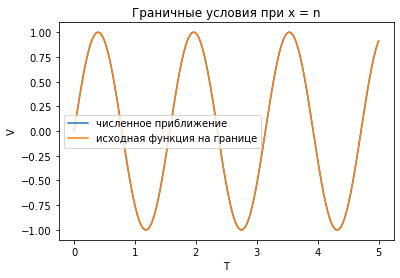

In [90]:
plt.plot(T[n], V[n], label='численное приближение')
plt.plot(np.linspace(0, 5, 1001), [np.sin(4 * t) for t in np.linspace(0, 5, 1001)], label = 'исходная функция на границе')
plt.xlabel('T')
plt.ylabel('V')
plt.title('Граничные условия при x = n')
plt.legend()
plt.show()

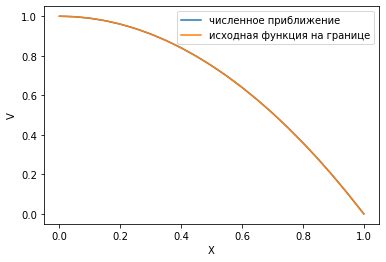

In [91]:
plt.plot(np.transpose(X)[0], np.transpose(V)[0], label = 'численное приближение')
plt.plot(np.linspace(0, 1, 1001), [1 - x * x for x in np.linspace(0, 1, 1001)], label = 'исходная функция на границе')
plt.xlabel('X')
plt.ylabel('V')
plt.legend()
plt.show()

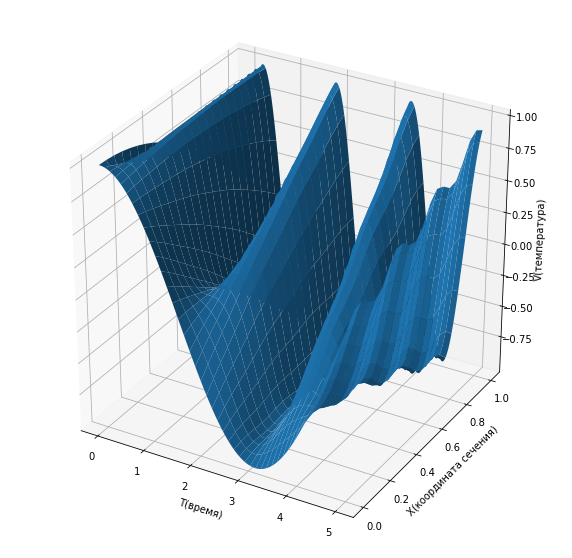

In [92]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Grab some test data.
#X, Y, Z = axes3d.get_test_data(0.05)
#print(X)
# Plot a basic wireframe.
ax.plot_surface(T, X, V)
ax.set_xlabel('T(время)')
ax.set_ylabel('X(координата сечения)')
ax.set_zlabel('V(температура)')

plt.show()